In [3]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, 
import tensorflow.keras.preprocessing.image
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os

In [7]:
file1 = os.path.join('E:/KrishM/ML/IMG/gsearchcars/train/classic', '2Q__ (2).jpg' )
imgc1 = cv2.imread(file1)

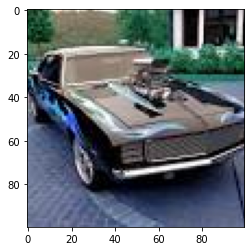

In [8]:
plt.imshow(imgc1)

In [10]:
imgc1.shape

(100, 100, 3)

In [13]:
len(imgc1[0])

100

In [14]:
imgc1

array([[[ 55,  92,  66],
        [ 37,  74,  48],
        [ 37,  72,  46],
        ...,
        [217, 210, 215],
        [215, 208, 213],
        [116, 109, 114]],

       [[ 30,  69,  43],
        [ 31,  70,  44],
        [ 37,  74,  48],
        ...,
        [224, 217, 222],
        [222, 215, 220],
        [112, 105, 110]],

       [[ 11,  52,  25],
        [ 35,  76,  49],
        [ 50,  89,  63],
        ...,
        [231, 224, 227],
        [228, 221, 224],
        [102,  95,  98]],

       ...,

       [[ 97, 108, 136],
        [100, 111, 139],
        [104, 113, 146],
        ...,
        [ 93, 103, 137],
        [ 95, 105, 139],
        [ 75,  85, 119]],

       [[109, 120, 148],
        [111, 122, 150],
        [110, 119, 152],
        ...,
        [ 98, 108, 142],
        [104, 114, 148],
        [ 89,  99, 133]],

       [[125, 136, 164],
        [120, 131, 159],
        [113, 122, 155],
        ...,
        [ 99, 109, 143],
        [107, 117, 151],
        [ 98, 108, 142]]

In [18]:
train = ImageDataGenerator(rescale = 1/255.0)

In [19]:
imgc1

array([[[ 55,  92,  66],
        [ 37,  74,  48],
        [ 37,  72,  46],
        ...,
        [217, 210, 215],
        [215, 208, 213],
        [116, 109, 114]],

       [[ 30,  69,  43],
        [ 31,  70,  44],
        [ 37,  74,  48],
        ...,
        [224, 217, 222],
        [222, 215, 220],
        [112, 105, 110]],

       [[ 11,  52,  25],
        [ 35,  76,  49],
        [ 50,  89,  63],
        ...,
        [231, 224, 227],
        [228, 221, 224],
        [102,  95,  98]],

       ...,

       [[ 97, 108, 136],
        [100, 111, 139],
        [104, 113, 146],
        ...,
        [ 93, 103, 137],
        [ 95, 105, 139],
        [ 75,  85, 119]],

       [[109, 120, 148],
        [111, 122, 150],
        [110, 119, 152],
        ...,
        [ 98, 108, 142],
        [104, 114, 148],
        [ 89,  99, 133]],

       [[125, 136, 164],
        [120, 131, 159],
        [113, 122, 155],
        ...,
        [ 99, 109, 143],
        [107, 117, 151],
        [ 98, 108, 142]]

In [21]:
validation = ImageDataGenerator(rescale= 1/255.0)

In [23]:
train_car_dataset = tf.keras.preprocessing.image_dataset_from_directory('E:/KrishM/ML/IMG/gsearchcars/train', label_mode = 'int', class_names = ('classic', 'sedan'))

Found 131 files belonging to 2 classes.


In [37]:
train_car_dataset = train.flow_from_directory('E:/KrishM/ML/IMG/gsearchcars/train/')

Found 131 images belonging to 2 classes.


In [38]:
train_car_dataset = train.flow_from_directory('E:/KrishM/ML/IMG/gsearchcars/train/', target_size = (200, 200), batch_size = 5, class_mode = 'binary')

Found 131 images belonging to 2 classes.


In [39]:
validation_car_dataset = validation.flow_from_directory('E:/KrishM/ML/IMG/gsearchcars/validation/', target_size = (200, 200), batch_size = 5, class_mode = 'binary')

Found 41 images belonging to 2 classes.


In [40]:
train_car_dataset.class_indices

{'classic': 0, 'sedan': 1}

In [41]:
validation_car_dataset.class_indices

{'classic': 0, 'sedan': 1}

In [42]:
train_car_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [53]:
import tensorflow as tf
modelcar = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'relu')
])

In [60]:
modelcar.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [61]:
modelcar.fit(train_car_dataset, epochs = 10)

Epoch 1/10
27/27 [==============================] - 7s 276ms/step - loss: 11.8925 - accuracy: 0.2290
Epoch 2/10
27/27 [==============================] - 7s 273ms/step - loss: 11.8925 - accuracy: 0.2290
Epoch 3/10
27/27 [==============================] - 8s 278ms/step - loss: 11.8925 - accuracy: 0.2290
Epoch 4/10
27/27 [==============================] - 8s 285ms/step - loss: 11.8925 - accuracy: 0.2290
Epoch 5/10
27/27 [==============================] - 7s 278ms/step - loss: 11.8925 - accuracy: 0.2290
Epoch 6/10
27/27 [==============================] - 8s 279ms/step - loss: 11.8925 - accuracy: 0.2290
Epoch 7/10
27/27 [==============================] - 7s 275ms/step - loss: 11.8925 - accuracy: 0.2290
Epoch 8/10
27/27 [==============================] - 7s 275ms/step - loss: 11.8925 - accuracy: 0.2290
Epoch 9/10
27/27 [==============================] - 7s 274ms/step - loss: 11.8925 - accuracy: 0.2290
Epoch 10/10
27/27 [==============================] - 7s 272ms/step - loss: 11.8925 - accura